In [1]:
# general imports
import pandas as pd
import numpy as np
import itertools

# display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# custom helper functions
%load_ext autoreload
%autoreload 2
from helper.general_helper import *


# view plotly in jupyter 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\walke\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
meta_df = getDF('../../data/meta_Health_and_Personal_Care.json.gz')

In [3]:
meta_df.head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0077614992,This is an example product description.,Principles of Mgmt + Oper-CSUF Custom C,http://ecx.images-amazon.com/images/I/51G%2BRq...,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],NaN,NaN
1,0615208479,By now we all know the benefits of exercise fo...,Brain Fitness Exercises Software,http://ecx.images-amazon.com/images/I/41kbZB04...,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",NaN,NaN
2,0615269990,What's wrong with your patient?Do all the symp...,Occam's Razor,http://ecx.images-amazon.com/images/I/51fH-ABe...,"{'also_bought': ['1935660152', '0071743979', '...",{'Toys & Games': 110575},"[[Health & Personal Care, Personal Care, Shavi...",34.99,NaN
3,0615315860,NaN,101 BlenderBottle Recipes Quick and Easy,http://ecx.images-amazon.com/images/I/21zOQu2Q...,"{'also_bought': ['B006VT9RBM', 'B0010JLMO8', '...",{'Health & Personal Care': 254068},[[Health & Personal Care]],NaN,NaN
4,0615406394,This is an example product description.,"Aphrodite Reborn - Women's Stories of Hope, Co...",http://ecx.images-amazon.com/images/I/51rJLgsi...,"{'also_bought': ['0966035232', '1421407205']}",{'Health & Personal Care': 377936},[[Health & Personal Care]],NaN,NaN


In [4]:
health_df = getDF('../../data/reviews_Health_and_Personal_Care_5.json.gz')

In [5]:
health_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011"


In [6]:
merged_df = health_df.merge(meta_df, how='left', on='asin')

In [7]:
merged_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,description,title,imUrl,related,salesRank,categories,price,brand
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011","The Pocket Magnifier is so popular, we are hav...","Lightwedge Lighted Pocket Magnifier, Plum",http://ecx.images-amazon.com/images/I/31eVZtZ%...,"{'also_bought': ['B002DGPUM2', 'B00524H8MC', '...",NaN,"[[Health & Personal Care, Medical Supplies & E...",24.95,NaN
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012","The Pocket Magnifier is so popular, we are hav...","Lightwedge Lighted Pocket Magnifier, Plum",http://ecx.images-amazon.com/images/I/31eVZtZ%...,"{'also_bought': ['B002DGPUM2', 'B00524H8MC', '...",NaN,"[[Health & Personal Care, Medical Supplies & E...",24.95,NaN
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010","The Pocket Magnifier is so popular, we are hav...","Lightwedge Lighted Pocket Magnifier, Plum",http://ecx.images-amazon.com/images/I/31eVZtZ%...,"{'also_bought': ['B002DGPUM2', 'B00524H8MC', '...",NaN,"[[Health & Personal Care, Medical Supplies & E...",24.95,NaN
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008","The Pocket Magnifier is so popular, we are hav...","Lightwedge Lighted Pocket Magnifier, Plum",http://ecx.images-amazon.com/images/I/31eVZtZ%...,"{'also_bought': ['B002DGPUM2', 'B00524H8MC', '...",NaN,"[[Health & Personal Care, Medical Supplies & E...",24.95,NaN
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011","The Pocket Magnifier is so popular, we are hav...","Lightwedge Lighted Pocket Magnifier, Plum",http://ecx.images-amazon.com/images/I/31eVZtZ%...,"{'also_bought': ['B002DGPUM2', 'B00524H8MC', '...",NaN,"[[Health & Personal Care, Medical Supplies & E...",24.95,NaN


#### Feature Engineering

##### mapping review count as high, medium, and low with iqr

In [10]:
# unpack sales rank and fill null with 0
merged_df.salesRank = merged_df.salesRank.apply(lambda x: unpack(x))
merged_df.salesRank.fillna(0, inplace=True)




# product review count
review_count = merged_df.groupby('asin').count().sort_values(by='reviewerID', ascending=False)['reviewerID']

# quartiles of review counts, these will be our mappings for feature engineering
quartile_list = review_count.quantile([0.25,0.5,0.75]).tolist()
# print(quartile_list)

# create dict of asin and low, med, high by quartile
prod_review_count_dict = dict(review_count.apply(lambda x: review_map(x)))

# create new column, product review counts with mapped dict
merged_df['prod_review_counts'] = merged_df['asin'].apply(lambda x: prod_review_count_dict[x])




# # transforming categories first pass, flatten lists
merged_df.categories = merged_df.categories.apply(lambda x: list(itertools.chain(*x)))

# # second pass
merged_df.categories = merged_df.categories.apply(lambda x: " ".join(x[1:]))



# fill missing titles with unknown
merged_df.title.fillna(value='unknown', inplace=True)
# do some basic prep on titles
merged_df.title = merged_df.title.apply(lambda x: "-".join(x.lower().split()))



# fill price nans with median price
median = merged_df.price.median()
merged_df.price.fillna(value=median, inplace=True)

##### general preprocessing

In [50]:
# merged_df.to_csv(r'../../merged_df.csv', index=False)
merged_df = pd.read_csv('../../merged_df.csv')

#### Questions
* distribution of price
* distribution of review time


#### feature engineering
* item_sim:
    * review text per item for similarity
    * categories
* user_sim:
    * number of reviews
    * median ratings
    * favorite category
    
    

#### ideas

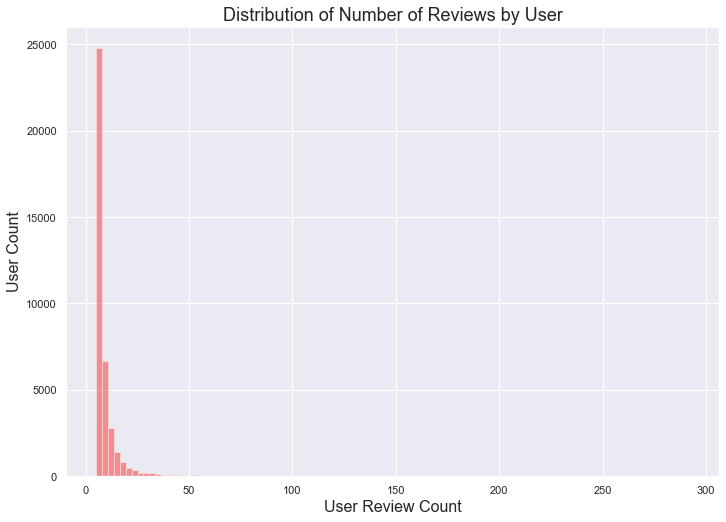

In [21]:
# Visualize the distribution of Review Counts

review_count = health_df.groupby('reviewerID').count()
figure = sns.distplot(review_count['asin'], kde=False, color='red', bins=100)
plt.title('Distribution of Number of Reviews by User', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('User Review Count', fontsize=16)
plt.ylabel('User Count', fontsize=16)
# plt.savefig(r"../images/dist_of_reviews");

In [23]:
# lets look at this with more detail
max = review_count['overall'].max()
min = review_count['overall'].min()
average = review_count['overall'].mean()
median = review_count['overall'].median()

print(f"The max number of reviews by user is {max} and the min number of reviews by user is {min}")
print(f"The average number of reviews by user is {average} and the median number of reviews by user is {median}")

The max number of reviews by user is 292 and the min number of reviews by user is 5
The average number of reviews by user is 8.970835815483436 and the median number of reviews by user is 6.0


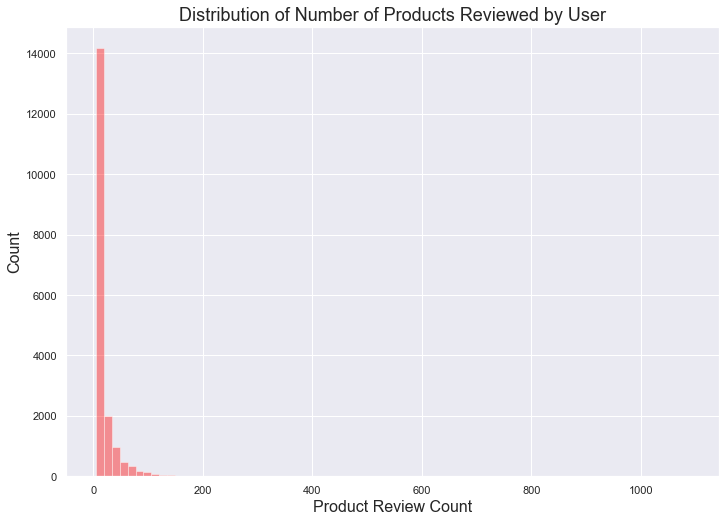

In [25]:
# Visualize the distribution of apps reviewed
prod_count = health_df.groupby('asin').count()

figure = sns.distplot(prod_count['reviewerID'], kde=False, color='red', bins=75)
plt.title('Distribution of Number of Products Reviewed by User', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Product Review Count', fontsize=16)
plt.ylabel('Count', fontsize=16)
# plt.savefig(r"../images/dist_of_prods");

In [26]:
# Lets look at this distribution in more detail
max = prod_count.reviewerID.max()
min = prod_count.reviewerID.min()
average = prod_count.reviewerID.mean()
median = prod_count.reviewerID.median()

print(f"The max number of reviews for apps is {max} and the min number of reviews for apps is {min}")
print(f"The average number of reviews for apps is {round(average, 3)} and the median number of reviews for apps is {median}")

The max number of reviews for apps is 1089 and the min number of reviews for apps is 5
The average number of reviews for apps is 18.688 and the median number of reviews for apps is 9.0


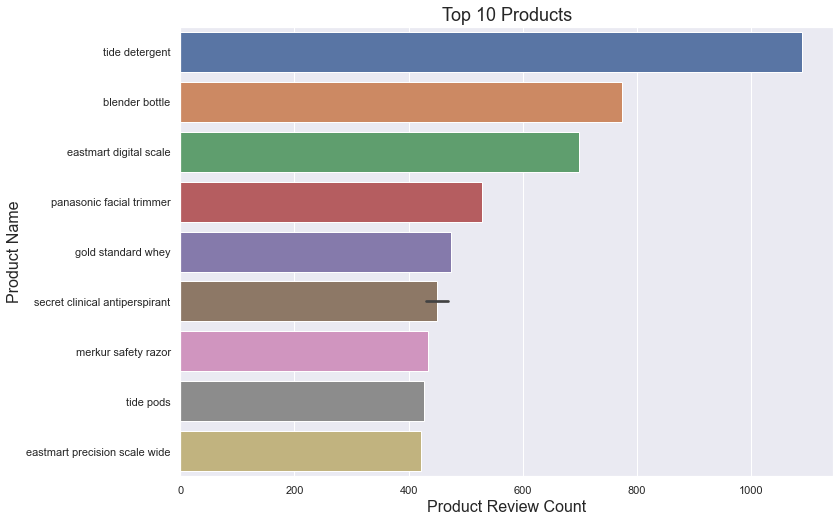

In [40]:
# top 10 most reviewed products
# ax = sns.barplot(x="tip", y="day", data=tips)

# top 10 apps
top_10_reviewed_products = merged_df.groupby('title').count().sort_values(by='reviewerID', ascending=False)['reviewerID'][1:11]

top_10_reviewed_products.index = ['tide detergent', 'blender bottle', 'eastmart digital scale', 'panasonic facial trimmer', 'gold standard whey',
                                 'secret clinical antiperspirant', 'merkur safety razor', 'secret clinical antiperspirant', 
                                 'tide pods', 'eastmart precision scale wide']

# idx_list = top_10_reviewed_apps.index.tolist()
figure = sns.barplot(x=top_10_reviewed_products, y=top_10_reviewed_products.index)
plt.title('Top 10 Products', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Product Review Count', fontsize=16)
plt.ylabel('Product Name', fontsize=16)
# plt.savefig(r"../images/top_10_prods");

In [51]:
top_10_cats = merged_df.groupby('categories').count().sort_values(by='asin', ascending=False)['asin'][:10]
top_10_cats

categories
Personal Care Shaving & Hair Removal Manual Shaving                                              9741
Vitamins & Dietary Supplements Herbal Supplements                                                6406
Vitamins & Dietary Supplements Multi & Prenatal Vitamins Multiple Vitamin-Mineral Supplements    6105
Personal Care Shaving & Hair Removal Trimmers & Clippers                                         5628
Vitamins & Dietary Supplements Supplements Digestive Supplements Dietary Fibers                  5094
Health Care Massage & Relaxation Aromatherapy Oils                                               4882
Household Supplies Paper & Plastic Bath Tissue                                                   3981
Household Supplies Laundry Liquid Detergent                                                      3853
Personal Care Deodorants & Antiperspirants Combination Deodorants & Antiperspirants              3648
Vitamins & Dietary Supplements Weight Loss Appetite Control & Suppressa

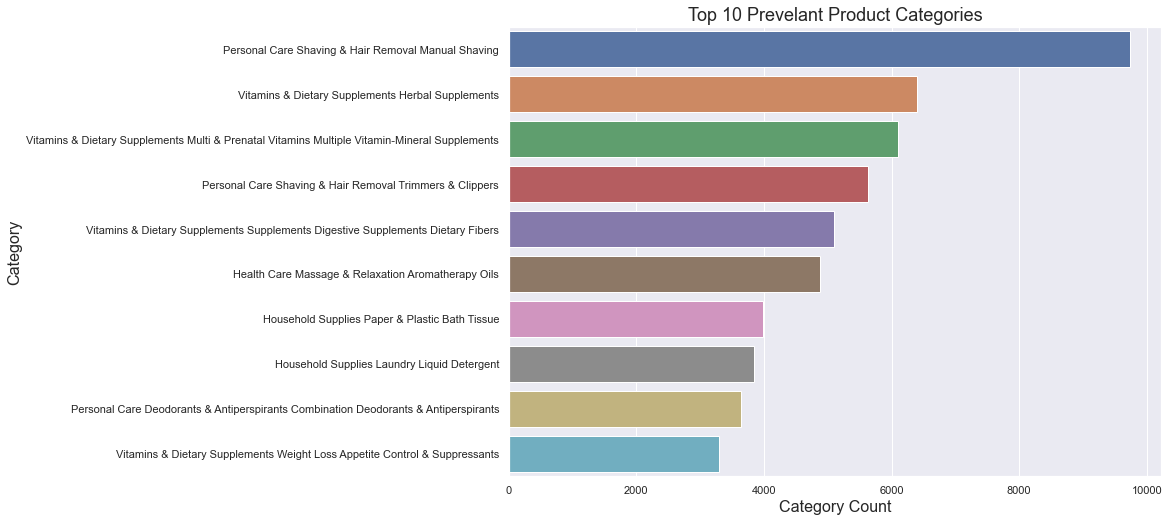

In [54]:
figure = sns.barplot(x=top_10_cats, y=top_10_cats.index)
plt.title('Top 10 Prevelant Product Categories', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Category Count', fontsize=16)
plt.ylabel('Category', fontsize=16)
# plt.savefig(r"../images/top_10_cats");

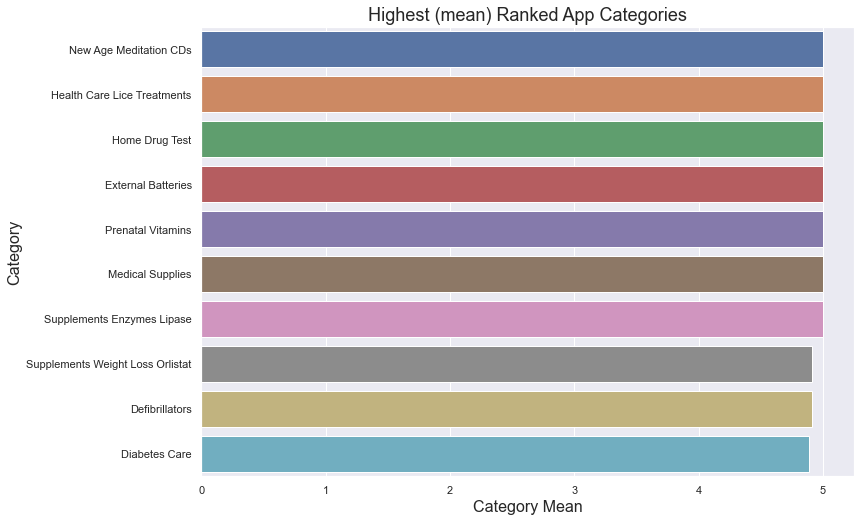

In [62]:
highest_rank = merged_df.groupby('categories').mean().sort_values(by='overall', ascending=False)['overall'][:10]
highest_rank.index = ['New Age Meditation CDs', 'Health Care Lice Treatments', 'Home Drug Test', 'External Batteries', 'Prenatal Vitamins', 
                     'Medical Supplies', 'Supplements Enzymes Lipase', 'Supplements Weight Loss Orlistat', 
                     'Defibrillators', 'Diabetes Care']

figure = sns.barplot(x=highest_rank, y=highest_rank.index)
plt.title('Highest (mean) Ranked App Categories', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Category Mean', fontsize=16)
plt.ylabel('Category', fontsize=16)
# plt.savefig(r"../images/top_10_cats");

In [66]:
merged_df['reviewTime'] = pd.to_datetime(merged_df['reviewTime'])
review_time = merged_df.groupby('reviewTime').count()['reviewerID'][5:]

In [67]:
review_time

reviewTime
2001-07-15      1
2001-08-14      1
2001-09-24      1
2001-12-19      1
2002-01-01      1
             ... 
2014-07-19    121
2014-07-20    172
2014-07-21    238
2014-07-22    184
2014-07-23     21
Name: reviewerID, Length: 3386, dtype: int64

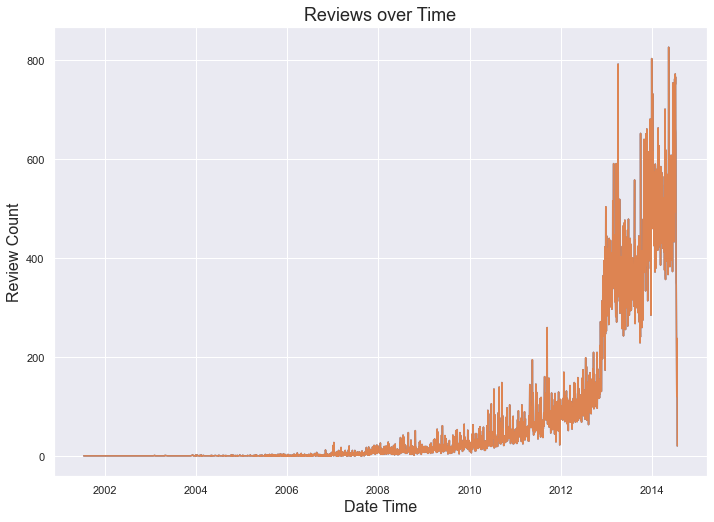

In [69]:
sns.lineplot(x=review_time.index, y=review_time)

figure = sns.lineplot(x=review_time.index, y=review_time)
plt.title('Reviews over Time', fontsize=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Date Time', fontsize=16)
plt.ylabel('Review Count', fontsize=16)
# plt.savefig(r"../images/Reviews_time.png");